In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('creditcard_fraud_detection.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [29]:
df['Time_Cos'] = np.cos(2 * np.pi * df['Time']/df['Time'].max())
df['Time_Sin'] = np.sin(2 * np.pi * df['Time']/df['Time'].max())

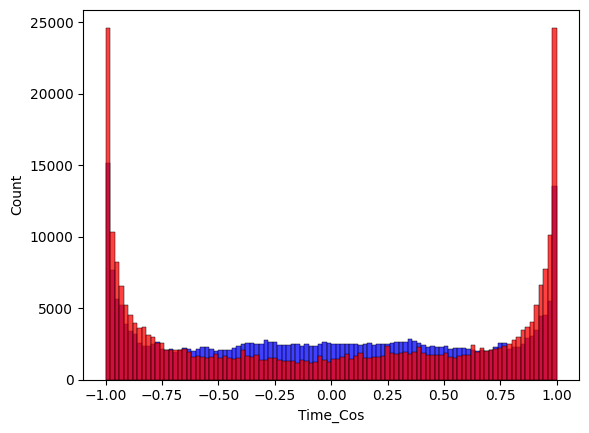

In [30]:
sns.histplot(data = df, x = 'Time_Cos', color = 'blue', bins = 100)
sns.histplot(data = df, x = 'Time_Sin', color = 'red', bins = 100)
plt.show()

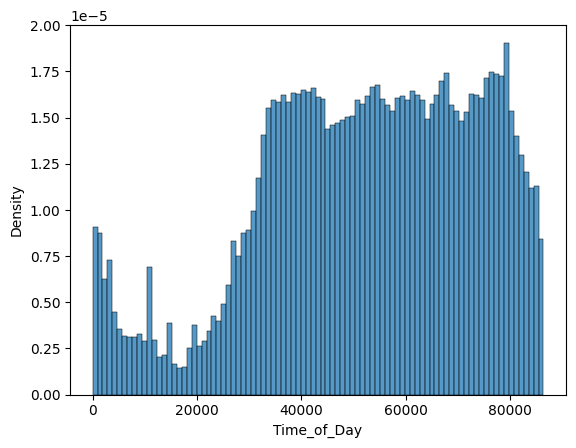

In [31]:
seconds_in_day = 24 * 60 * 60
df['Time_of_Day'] = df['Time'] % seconds_in_day
sns.histplot(data = df, x = 'Time_of_Day', stat = 'density' )
plt.show()


In [5]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [12]:
print(df.isna().sum().sum())

0


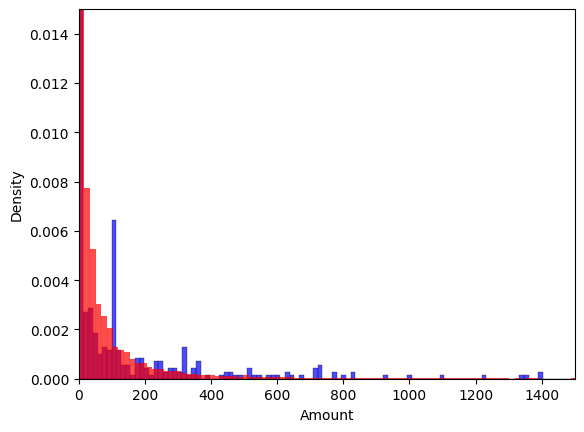

In [28]:
df_fraud = df[df['Class'] == 1]
df_nofraud = df[df['Class'] ==  0]
sns.histplot(data = df_fraud, x = 'Amount', color = 'blue',alpha = 0.7, stat = 'density',bins = 150)
sns.histplot(data = df_nofraud, x = 'Amount', color = 'red',alpha = 0.7, stat = 'density', bins = 1500)
plt.ylim(0,0.015)
plt.xlim(0,1500)
plt.show()

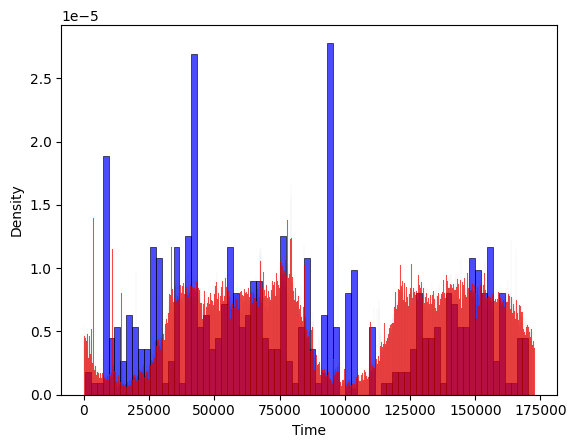

In [27]:
df_fraud = df[df['Class'] == 1]
df_nofraud = df[df['Class'] ==  0]
sns.histplot(data = df_fraud, x = 'Time', color = 'blue',alpha = 0.7, stat = 'density',bins = 75)
sns.histplot(data = df_nofraud, x = 'Time', color = 'red',alpha = 0.7, stat = 'density', bins = 1500)

plt.show()


In [24]:
print(df_fraud['Amount'].mean())
print(df_nofraud['Amount'].mean())

122.21132113821139
88.29102242231328


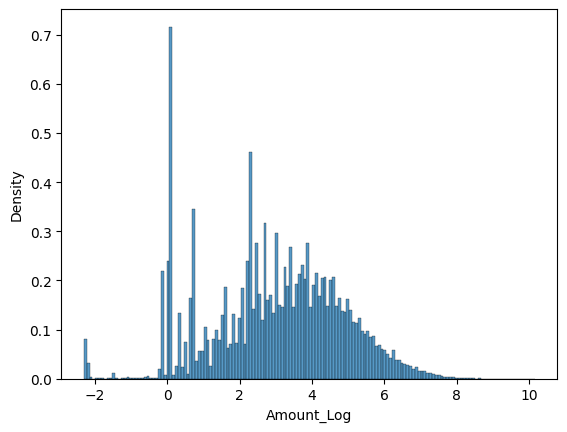

In [34]:
df['Amount_Log'] = np.log(df['Amount'] + 0.1)
sns.histplot(data= df, x = 'Amount_Log', stat = 'density')
plt.show()